# Дискретные сиcтемы

Система с дискретным временем $S$ - преобразование переводящее входной дискретный сигнал $x[n]$ в выходной сигнал $y[n]$:

$$y[n] = S(x[n])$$


## Идеальная система задержки
$$y[n] = x[n-n_d]$$

In [4]:
def ideal_delay_system(x, n_d):
    n_d = int(n_d)
    y = [(x[n-n_d] if n>n_d else 0) for n in range(len(x))]
    return np.array(y)

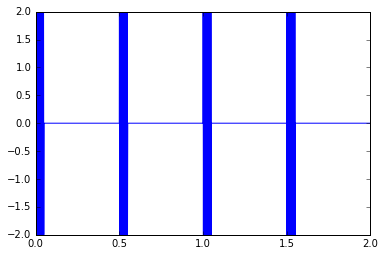

In [5]:
import numpy as np
import pylab as plt
import sounddevice as sd
from scipy import signal as sg

%matplotlib inline

fs = 44100
n_samples = 2*fs
n = np.arange(n_samples)
t = n/fs
x = np.sin(2*np.pi*300*t)
x[(t>1.2)] = np.sin(2*np.pi*600*t[(t>1.2)])
#plt.axvline(n_samples/3.*4/fs)
x *= sg.square(2*np.pi*2*t, 1/10) + 1

plt.plot(t,x)
sd.play(x, fs)
#plt.xlim(0, 0.1)

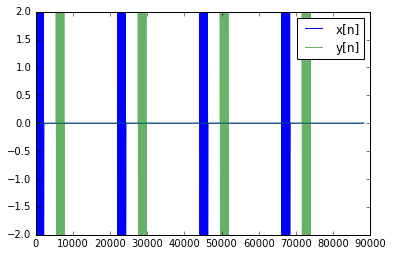

In [6]:
y = ideal_delay_system(x, 1/8*fs)
plt.plot(x, label='x[n]')
plt.plot(y, alpha=0.6, label='y[n]')
plt.legend()

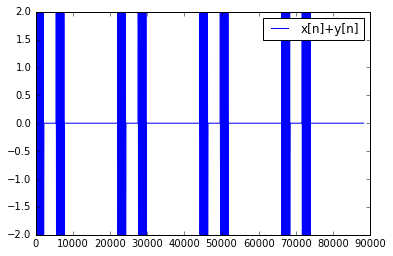

In [7]:
z = x + y
plt.plot(z, label='x[n]+y[n]')
plt.legend()
sd.play(z, fs)

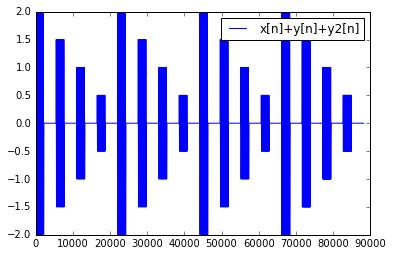

In [8]:
y2 = ideal_delay_system(y, 1/8*fs)
y3 = ideal_delay_system(y2, 1/8*fs)
z = x + y*3/4 + y2*2/4 + y3*1/4
plt.plot(z, label='x[n]+y[n]+y2[n]')
plt.legend()
sd.play(z, fs)

### Скользящее среднее
$$y[n] = \frac{1}{M_l + M_R + 1}\sum_{k=-M_l}^{M_r}x[n-k]$$

In [9]:
def moving_average(x, ml, mr):
    n_samples = len(x)
    x = np.hstack([np.zeros(ml), x, np.zeros(mr)])
    y = [sum([x[n-k] for k in range(-ml, mr+1)]) for n in range(ml, len(x)-mr)]
    return np.array(y)/(1+ml+mr)

(1, 5512.5)

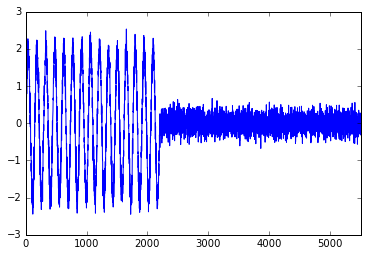

In [10]:
%matplotlib inline
noise = np.random.normal(scale=0.2, size=n_samples)
#noise = np.sin(2*np.pi*900*t)
x_bad = x + noise
plt.plot(x_bad, label='x_bad[n]')
sd.play(x_bad, fs)
plt.xlim(1, fs/8)

(1378.125, 2756.25)

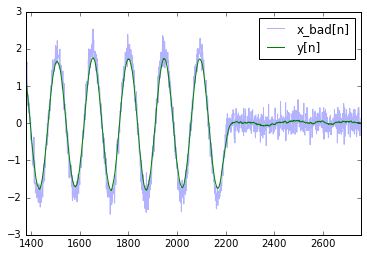

In [11]:
%matplotlib inline
y = moving_average(x_bad, 20, 20)
plt.plot(x_bad, label='x_bad[n]', alpha=0.3)
plt.plot(y, label='y[n]')
plt.legend()
sd.play(y, fs)
plt.xlim(fs/16/2, fs/16)

## Линейные системы
Система $S$ называется линейной если: 
$$S(a_1x_1[n] + a_2x_2[n]) = a_1S(x_1[n]) + a_2S(x_2[n])$$

Какие из следующих систем являются линейными?
1. $y[n] = x[n-n_d]$

2. $y[n] = \frac{1}{M_l + M_R + 1}\sum_{k=-M_l}^{M_r}x[n-k]$

3. $y[n] = x^2[n]$

### Примеры
Сумматор:

$y[n] = \sum_{k=-\infty}^{n}x[k]$

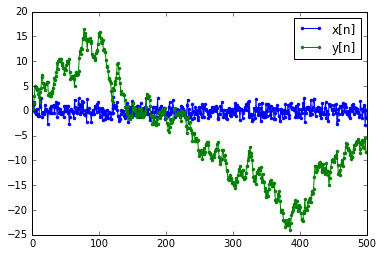

In [14]:
def accumulator(x):
    y = [sum(x[:n]) for n in range(len(x))]
    return np.array(y)

x = np.random.normal(size=500)
y = accumulator(x)
plt.plot(x, '.-', label='x[n]')
plt.plot(y, '.-', label='y[n]')
plt.legend()

$y[n] = log_{10}(|x[n]|+0.00001)$

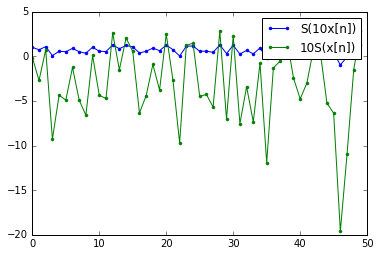

In [15]:
def log10(x):
    y = np.log10(np.abs(x)+0.00001)
    return np.array(y)

x = np.random.normal(size=50)
#plt.plot(x, '.-', alpha=0.3, label='x[n]')
plt.plot(log10(10*x), '.-', label='S(10x[n])')
plt.plot(10*log10(x), '.-', label='10S(x[n])')
plt.legend()

### Стационарность
$y[n] = S(x[n])$

$S(x[n-n_0]) = y[n-n_0]$, $\forall n_0: -\infty < n_0 < \infty$

#### Стационарность сумматора:

$y[n] = \sum_{k=-\infty}^{n}x[k]$

$y[n-n_0] = \sum_{k=-\infty}^{n-n0}x[k] = \sum_{k'=-\infty}^{n}x[k'-n_0] = S(x[n - n_0])$

$k' = k + n_0$

Для верхней границы суммы $k=n - n_0$, $k'=n$

#### Уплотнитель:
$y[n] = x[2n]$

$y[n-n0] = x[2n-n_0]$

$S(x[n-n_0]) = S(x[n']) = x[2n'] = x[2(n - n_0)]$



### Каузальность
$y[n] = S(x[n]) = f(x[n], x[n-1], x[n-2], ...)$


Примеры:

$S_1$: $y[n] = x[n+1] - x[n]$

$S_2$: $y[n] = x[n] - x[n-1]$

### Устойчивость

$|x[n]| \le B_x <\infty$ $\forall n $

$|y[n]| \le B_y <\infty$ $\forall n $


Примеры:
1. $y[n] = x^2[n]$
2. $y[n] = \sum_{k=-\infty}^{n}x[k]$

(-10, 10)

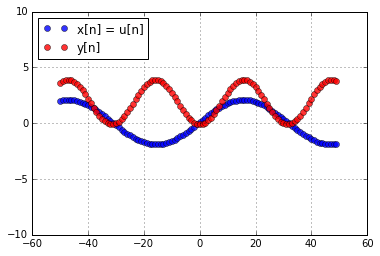

In [16]:
n = np.arange(-50, 50)
x = 2*np.sin(n/10)
y = x**2

plt.plot(n, x+0.1, 'o', alpha=0.8, label='x[n] = u[n]')
plt.plot(n, y-0.1, 'or', alpha=0.8, label='y[n]')
plt.legend(loc=2)
plt.grid()
plt.ylim(-10, 10)

(-1, 10)

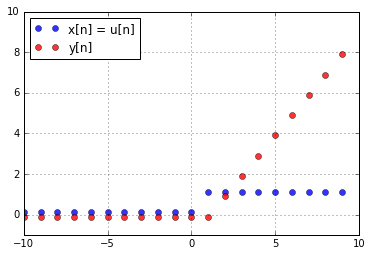

In [17]:
n = np.arange(-10, 10)
x = (n > 0).astype(int)
y = accumulator(x)

plt.plot(n, x+0.1, 'o', alpha=0.8, label='x[n] = u[n]')
plt.plot(n, y-0.1, 'or', alpha=0.8, label='y[n]')
plt.legend(loc=2)
plt.grid()
plt.ylim(-1, 10)

### Линейная стационарная система
Система $S$ называется линейной стационарная системой (LTI) если:
1. $S(a_1x_1[n] + a_2x_2[n]) = a_1S(x_1[n]) + a_2S(x_2[n])$
2. $y[n] = S(x[n]) \Rightarrow S(x[n-n_0]) = y[n-n_0]$, $\forall n_0: -\infty < n_0 < \infty$

Напоминание:

$x[n] = \sum_{k=-\infty}^\infty x[k]\delta[n-k]$

Пусть $S$ - LTI. Тогда:

$y[n] = S(x[n]) = S\Big(\sum_{k=-\infty}^\infty x[k]\delta[n-k]\Big) = $

$ = \sum_{k=-\infty}^\infty x[k]S(\delta[n-k]) = $

$ = \sum_{k=-\infty}^\infty x[k]h[n-k]$

Свертка:

$ y[n] = x[n]*h[n]$

$h[n]$ - *импульсная характеристика системы*

#### Примеры

###### Идеальная система задержки:

$h[n] = S(\delta[n]) = \delta[n-n_d]$

$y[n] = x[n] * h[n] = \sum_{k=-\infty}^\infty x[k]h[n-k] = $

$ = \sum_{k=-\infty}^\infty x[k]\delta[n-n_d-k] = x[n-n_d]$

###### Скользящее среднее 

$y[n] = S(x[n]) = \frac{1}{3}\sum_{k=-1}^{1}x[n-k]$

$h[n] = S(\delta[n]) = \frac{1}{3}\sum_{k=-1}^{1}\delta[n-k] = $
$\delta[n-1]/3 + \delta[n]/3 + \delta[n+1]/3 $

(-11, 11)

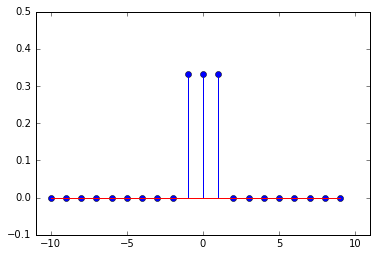

In [18]:
n = np.arange(-10, 10)
h = (n-1==0).astype(int)/3 + (n==0).astype(int)/3 + (n+1==0).astype(int)/3


plt.stem(n, h)
plt.ylim(-0.1, 0.5)
plt.xlim(-11, 11)

<Container object of 3 artists>

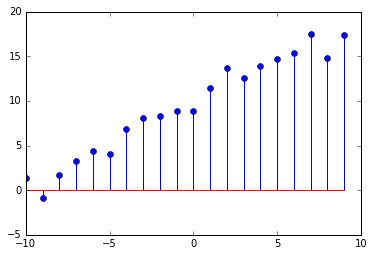

In [19]:
x = np.random.normal(size=len(n)) + np.arange(len(n))
plt.stem(n, x)

<Container object of 3 artists>

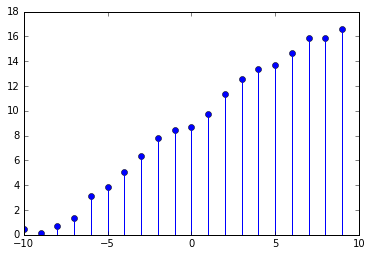

In [20]:
plt.stem(n, np.convolve(x, h,'same'))

(0, 0.1)

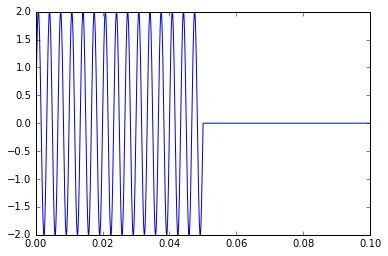

In [16]:
fs = 44100
n_samples = 2*fs
n = np.arange(n_samples)
t = n/fs
x = np.sin(2*np.pi*300*t)
x[(t>1.2)] = np.sin(2*np.pi*600*t[(t>1.2)])
#plt.axvline(n_samples/3.*4/fs)
x *= sg.square(2*np.pi*2*t, 1/10) + 1

x = np.hstack([x, x])
t = np.arange(len(x))/fs

plt.plot(t,x)
sd.play(x, fs)

plt.xlim(0, 0.1)

(0, 0.1)

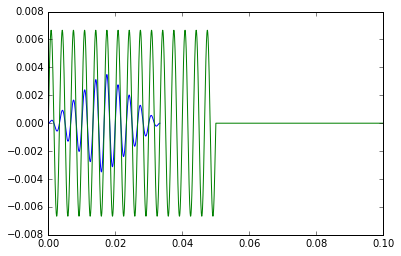

In [17]:
f0 = 300
n_h = np.arange(10*fs//f0)
h = np.sin(2*np.pi*f0*n_h/fs)
h[:len(h)//2] *= np.arange(len(h)//2)
h[len(h)//2:] *= np.arange(len(h)//2+len(h)%2)[::-1]
h /= 200000
plt.plot(n_h/fs, h)
plt.plot(t,x/300)
plt.xlim(0, 0.1)

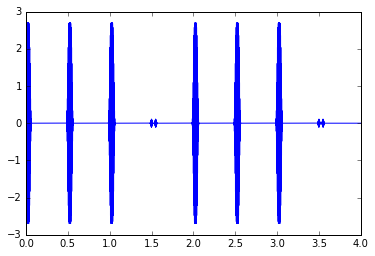

In [63]:
y = np.convolve(x, h,'same')
plt.plot(t, y)
#sd.play(y, fs)
#plt.xlim(0, 0.1)

In [ ]:
y.shape, 